In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Set the path of the dataset
dataset_path = "data/asl_alphabet_train/asl_alphabet_train"




In [2]:
from keras.preprocessing import image

# Initialize arrays to hold data and labels
data = []
labels = []
labels_dict = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, 'N':13, 'O':14, 'P':15, 'Q':16, 'R':17, 'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, 'Z':25}

def load_data(dataset_path):
    # Loop through each subdirectory in the main directory
    for directory in sorted(os.listdir(dataset_path)):
        if directory in labels_dict:
            print(f"{directory}")
            for file in os.listdir(f"{dataset_path}/{directory}"):
                # Load image file and convert it to numpy array
                img = image.load_img(f"{dataset_path}/{directory}/{file}", target_size=(64, 64))
                img = image.img_to_array(img)

                # Convert image data to numpy array and flatten it
                img_data = img.flatten()

                # Append image data to data array
                data.append(img_data)

                # Append label to labels array
                labels.append(directory)
    return np.array(data), np.array(labels)



In [3]:
data, labels = load_data(dataset_path)
# Normalize image data
data = data / 255.0

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


In [4]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)


In [6]:
# Create a decision tree classifier
classifier = tree.DecisionTreeClassifier()

In [7]:
# Train the classifier
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [8]:
# Use the classifier to make predictions on the test set
predictions = classifier.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 87.07%


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns



[[748  63  31  15  21   6   1   0   0   0   0   0   3   0   7   0   0   0
    0   2   1   0   0   0   0   0]
 [ 81 669  20  31  32  23   2   0   0   2   0   0   1   0   2   0   0   0
    0   2   0   0   0   0   0   0]
 [ 31  41 750  71  10   7   1   1   0   0   1   5   4   0   0   2   0   0
    0   4   1   0   0   0   0   0]
 [ 13  49  50 699  31  19   1   3   0   0   0   1   0   0   0   0   1   1
    1   1   1   0   1   0   1   0]
 [ 18  25   7  28 757  41   1   0   2   0   0   0   1   0   0   1   0   0
    2   1   4   1   2   0   0   1]
 [  5  22   9  19  55 746   7   0   0   0   1   0   0   0   0   0   0   0
    1   1   4   4   2   0   6   1]
 [  1   1   1   4   3   4 803  33  12  13   4   0   0   0   0   3   1   4
    0   0   0   0   0   1   0   0]
 [  1   0   0   0   0   2  34 796  13  11  12   0   1   1   0   5   0   1
    0   0   0   0   0   1   0   0]
 [  0   0   0   1   0   0  19  10 798  20  19   1   0   0   1   0   1   7
    1   0   0   0   0   2   0   0]
 [  0   0   0   0  

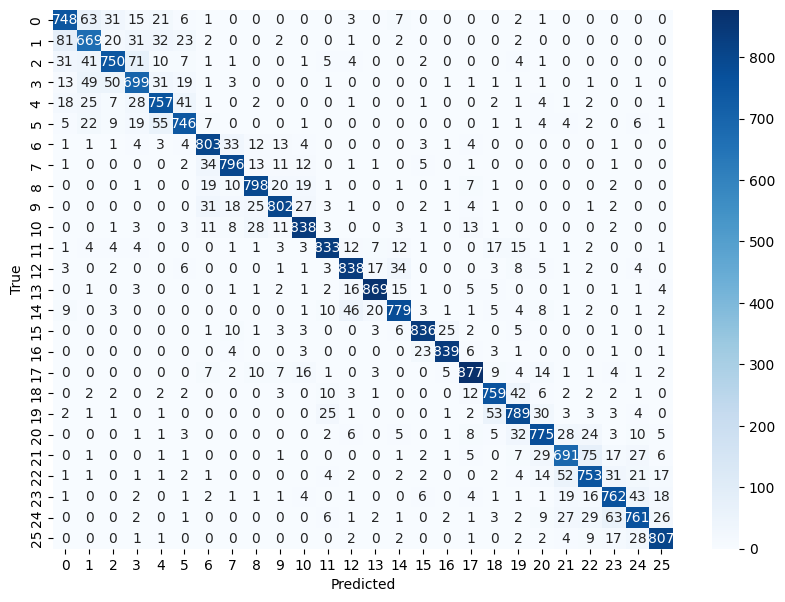

In [10]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, predictions)
print(conf_mat)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:


# Evaluate the model
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='weighted'))
print('Recall:', recall_score(y_test, predictions, average='weighted'))
print('F1 Score:', f1_score(y_test, predictions, average='weighted'))
print('\nClassification Report:\n', classification_report(y_test, predictions))

Accuracy: 0.8706837606837606
Precision: 0.8709465813210641
Recall: 0.8706837606837606
F1 Score: 0.8707000565477101

Classification Report:
               precision    recall  f1-score   support

           A       0.82      0.83      0.83       898
           B       0.76      0.77      0.77       865
           C       0.85      0.81      0.83       929
           D       0.79      0.80      0.80       873
           E       0.83      0.85      0.84       892
           F       0.86      0.84      0.85       883
           G       0.87      0.90      0.89       888
           H       0.90      0.91      0.90       878
           I       0.89      0.91      0.90       880
           J       0.91      0.87      0.89       918
           K       0.90      0.90      0.90       926
           L       0.92      0.90      0.91       923
           M       0.89      0.90      0.90       928
           N       0.94      0.94      0.94       929
           O       0.90      0.87      0.88      

In [13]:
from keras.preprocessing import image

# Load and preprocess the image
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return img_array_expanded_dims / 255.0



Predicted class: ['P']


In [18]:
# Load the image
A_Our = prepare_image('./OurAlphabet/A.jpg')

# Reshape the image to flatten it
A_Our = A_Our.reshape(A_Our.shape[0], -1)

# Predict the class of the image using the trained classifier
A_Our_pred = classifier.predict(A_Our)

# Print the predicted class
print('Predicted class from our picture :', A_Our_pred , 'Actual class: A'  )


K_Our = prepare_image('./OurAlphabet/K.jpg')
K_Our = K_Our.reshape(K_Our.shape[0], -1)
K_Our_pred = classifier.predict(K_Our)
print('Predicted class from our picture :', K_Our_pred , 'Actual class: K'  )

U_Our = prepare_image('./OurAlphabet/U.jpg')
U_Our = U_Our.reshape(U_Our.shape[0], -1)
U_Our_pred = classifier.predict(U_Our)
print('Predicted class from our picture :', U_Our_pred , 'Actual class: U'  )

W_Our = prepare_image('./OurAlphabet/W.jpg')
W_Our = W_Our.reshape(W_Our.shape[0], -1)
W_Our_pred = classifier.predict(W_Our)
print('Predicted class from our picture :', W_Our_pred , 'Actual class: W'  )

Z_Our = prepare_image('./OurAlphabet/Z.jpg')
Z_Our = Z_Our.reshape(Z_Our.shape[0], -1)
Z_Our_pred = classifier.predict(Z_Our)
print('Predicted class from our picture :', Z_Our_pred , 'Actual class: Z'  )

for file in os.listdir("data/asl_alphabet_test/asl_alphabet_test/"):
    print(file)
    path = "data/asl_alphabet_test/asl_alphabet_test/"
    img = prepare_image(path + file)
    img = img.reshape(img.shape[0], -1)
    img_pred = classifier.predict(img)
    print('Worst quality test pictures', img_pred , 'Actual class: ' + file[0]  )



Predicted class: ['P'] Actual class: A
Predicted class: ['P'] Actual class: K
Predicted class: ['P'] Actual class: U
Predicted class: ['P'] Actual class: W
Predicted class: ['P'] Actual class: Z
F_test.jpg
Predicted class: ['F'] Actual class: F
G_test.jpg
Predicted class: ['G'] Actual class: G
L_test.jpg
Predicted class: ['L'] Actual class: L
M_test.jpg
Predicted class: ['M'] Actual class: M
R_test.jpg
Predicted class: ['R'] Actual class: R
S_test.jpg
Predicted class: ['S'] Actual class: S
X_test.jpg
Predicted class: ['X'] Actual class: X
Y_test.jpg
Predicted class: ['Y'] Actual class: Y
U_test.jpg
Predicted class: ['U'] Actual class: U
T_test.jpg
Predicted class: ['T'] Actual class: T
A_test.jpg
Predicted class: ['E'] Actual class: A
K_test.jpg
Predicted class: ['K'] Actual class: K
J_test.jpg
Predicted class: ['J'] Actual class: J
Z_test.jpg
Predicted class: ['Z'] Actual class: Z
nothing_test.jpg
Predicted class: ['C'] Actual class: n
Q_test.jpg
Predicted class: ['Q'] Actual class: Q

In [25]:
from tabulate import tabulate

def process_and_predict_image(image_path, classifier, actual_class):
    # Load the image
    img = prepare_image(image_path)
    # Reshape the image to flatten it
    img = img.reshape(img.shape[0], -1)
    # Predict the class of the image using the trained classifier
    img_pred = classifier.predict(img)
    # Return the predicted class and actual class
    return img_pred, actual_class

# Define list of images with their actual classes
images = [
    ('./OurAlphabet/A.jpg', 'A'),
    ('./OurAlphabet/K.jpg', 'K'),
    ('./OurAlphabet/U.jpg', 'U'),
    ('./OurAlphabet/W.jpg', 'W'),
    ('./OurAlphabet/Z.jpg', 'Z')
]

results = []
for image_path, actual_class in images:
    img_pred, actual_class = process_and_predict_image(image_path, classifier, actual_class)
    results.append([actual_class, img_pred])

print(tabulate(results, headers=["Actual Class", "Predicted Class"], tablefmt='pretty'))

print("\nWorst quality test pictures:")

test_images_directory = "data/asl_alphabet_test/asl_alphabet_test/"
test_results = []
for file in os.listdir(test_images_directory):
    image_path = os.path.join(test_images_directory, file)
    actual_class = file[0]
    img_pred, actual_class = process_and_predict_image(image_path, classifier, actual_class)
    test_results.append([actual_class, img_pred])

print(tabulate(test_results, headers=["Actual Class", "Predicted Class"], tablefmt='pretty'))


+--------------+-----------------+
| Actual Class | Predicted Class |
+--------------+-----------------+
|      A       |      ['P']      |
|      K       |      ['P']      |
|      U       |      ['P']      |
|      W       |      ['P']      |
|      Z       |      ['P']      |
+--------------+-----------------+

Worst quality test pictures:
+--------------+-----------------+
| Actual Class | Predicted Class |
+--------------+-----------------+
|      F       |      ['F']      |
|      G       |      ['G']      |
|      L       |      ['L']      |
|      M       |      ['M']      |
|      R       |      ['R']      |
|      S       |      ['S']      |
|      X       |      ['X']      |
|      Y       |      ['Y']      |
|      U       |      ['U']      |
|      T       |      ['T']      |
|      A       |      ['E']      |
|      K       |      ['K']      |
|      J       |      ['J']      |
|      Z       |      ['Z']      |
|      n       |      ['C']      |
|      Q       |      ['Q

In [ ]:
# Load the image
new_image = prepare_image('./OurAlphabet/A.jpg')

# Reshape the image to flatten it
new_image = new_image.reshape(new_image.shape[0], -1)

# Predict the class of the image using the trained classifier
prediction = classifier.predict(new_image)

# Print the predicted class
print('Predicted class:', prediction)